__<span style="background-color:#ffffe0">第3章　時系列予測モデル構築・超入門</span>__

# 3.3　時系列の予測モデルを構築してみよう

## 3.3.4　ホルトウィンターズで構築する予測モデル

### 準備（必要なモジュールとデータの読み込み）

In [1]:
#
# 必要なモジュールの読み込み
#

import pandas as pd
import numpy as np
import datetime

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] #グラフサイズ
plt.rcParams['font.size'] = 14 #フォントサイズ

In [2]:
#
# 必要なデータセット（時系列データ）の読み込み
#

dataset='AirPassengers.csv'   #データセットのファイル名
df=pd.read_csv(
    dataset,
    index_col='Month',   #変数「Month」をインデックスに設定
    parse_dates=True)    #インデックスを日付型に設定

In [3]:
#
# データセットを学習データとテストデータ（直近12ヶ月間）に分割
#

train, test = train_test_split(df, test_size=12)

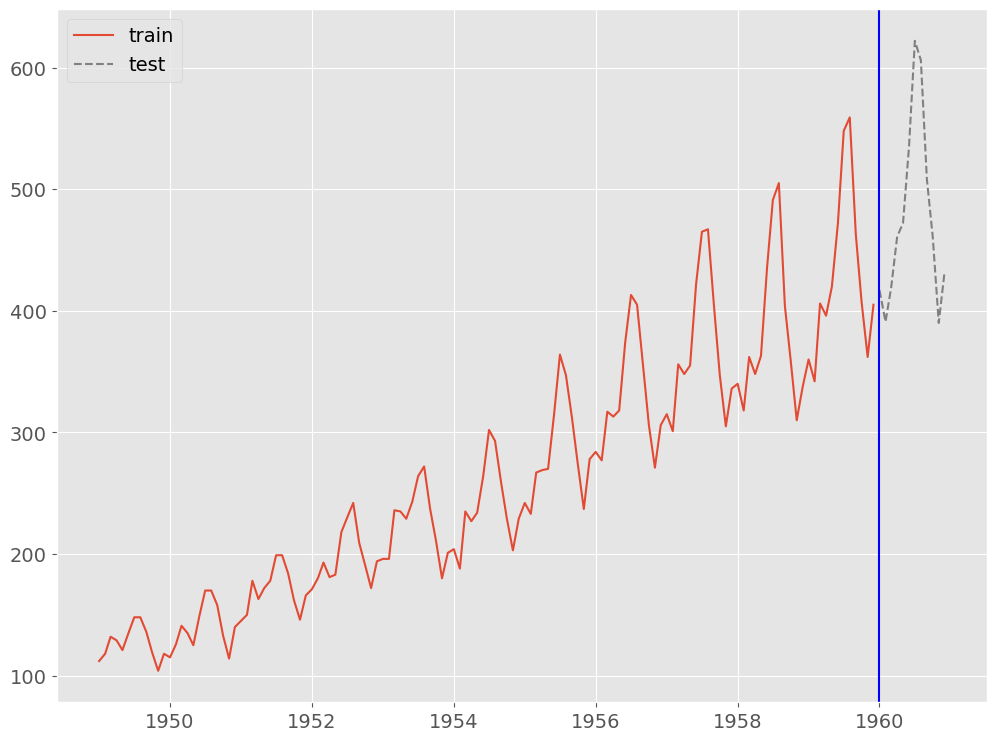

In [4]:
#
# グラフ（学習データとテストデータ）
#

fig, ax = plt.subplots()

# 学習データの描写
ax.plot(
    train.index,
    train.values, 
    linestyle='-',
    label='train')

# テストデータの描写
ax.plot(
    test.index, 
    test.values, 
    linestyle='--',
    label='test', 
    color='gray') 

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    datetime.datetime(1960,1,1),
    color='blue') 

# 凡例表示
ax.legend() 

plt.show()

### 予測モデルの学習（学習データ利用）

In [5]:
#
# 予測モデルの学習（学習データ利用）
#

# インスタンス生成
HW_model = ExponentialSmoothing(
    train,                 #学習データ
    trend = 'additive',    #トレンド成分：加法
    seasonal = 'additive', #季節成分：加法
    seasonal_periods = 12) #季節成分の周期

# 学習
HW_model_fitted = HW_model.fit()

### 予測モデルのテスト（テストデータ利用）

In [6]:
#
# 予測の実施
#

# 学習データ期間の予測値
train_pred = HW_model_fitted.fittedvalues

# テストデータ期間の予測値
test_pred = HW_model_fitted.forecast(12)

In [7]:
#
# 予測精度（テストデータ）
#

print('RMSE:\n',
      np.sqrt(mean_squared_error(
          test.Passengers, test_pred)))
print('MAE:\n',
      mean_absolute_error(
          test.Passengers, test_pred)) 
print('MAPE:\n',
      mean_absolute_percentage_error(
          test.Passengers, test_pred))

RMSE:
 16.979663509487658
MAE:
 13.380100540794189
MAPE:
 0.02802757455702637


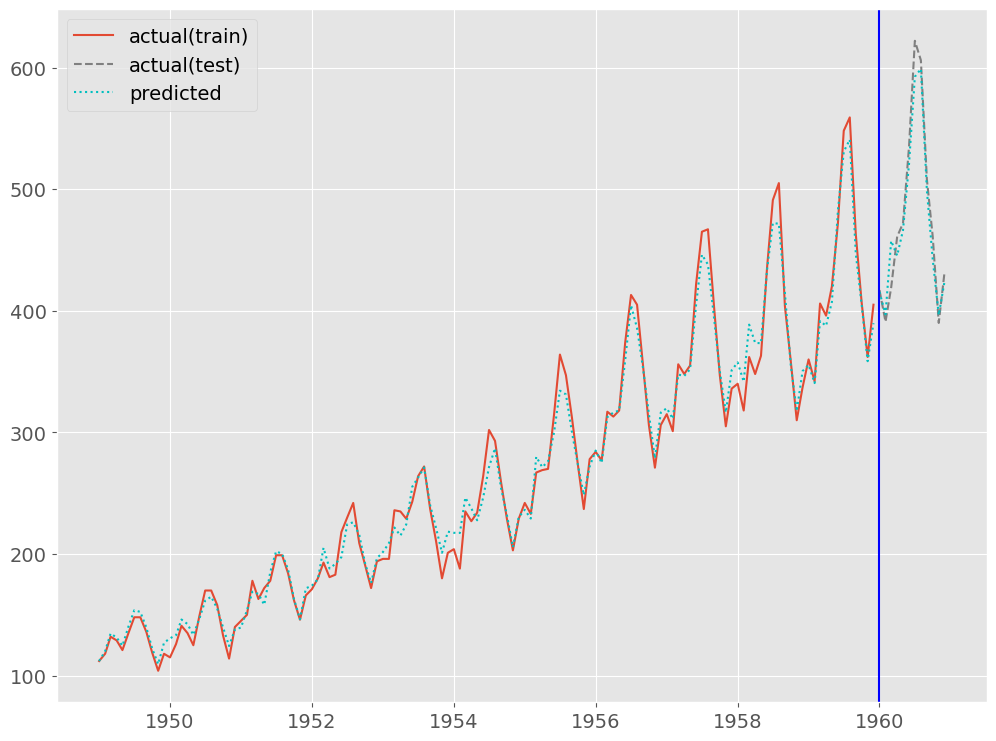

In [10]:
#
# グラフ（予測値と実測値）
#

fig, ax = plt.subplots()

# 実測値の描写
## 学習データ
ax.plot(
    train.index, 
    train.Passengers, 
    linestyle='-',
    label='actual(train)')

## テストデータ
ax.plot(
    test.index, 
    test.Passengers, 
    linestyle='--',
    label='actual(test)', 
    color='gray')

# 予測値の描写
## 学習データ
ax.plot(
    train.index, 
    train_pred, 
    linestyle=':',
    color='c')

## テストデータ
ax.plot(
    test.index, 
    test_pred, 
    linestyle=':',
    label="predicted",
    color="c") 

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    datetime.datetime(1960,1,1),
    color='blue')

# 凡例表示
ax.legend()

plt.show()